<a href="https://colab.research.google.com/github/Lenalex45/MachineLearningTD1/blob/main/TP1_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [171]:
import io
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

***LOAD THE DATA***

In [172]:
#only for google colab

from google.colab import files
uploaded = files.upload()

Saving stress_classification.csv to stress_classification (2).csv


In [173]:
#open the file as a DataFrame

df = pd.read_csv('stress_classification.csv', delimiter=';')
df

,snoring_range,respiration_rate,body_temperature,limb_movement_rate,blood_oxygen_levels,rapid_eye_movement,hour_of_sleep,heart_rate,stress_level
0,93.800,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.640,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.000,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.760,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.120,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0
...,...,...,...,...,...,...,...,...,...
625,69.600,20.960,92.960,10.960,90.960,89.80,3.440,62.40,2
626,48.440,17.376,98.064,6.752,96.376,73.76,8.376,53.44,0
627,97.504,27.504,86.880,17.752,84.256,101.88,0.000,78.76,4
628,58.640,19.728,95.728,9.728,94.592,84.32,6.728,59.32,1


***EXPLORE THE DATA***

In [174]:
df.head()

,snoring_range,respiration_rate,body_temperature,limb_movement_rate,blood_oxygen_levels,rapid_eye_movement,hour_of_sleep,heart_rate,stress_level
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [175]:
#Check for any missing or null values in the dataset 
#the nb seen here corresponds to the nb of missing value in each column
#No Null value found for any feature -> idea to erase the row in case of null value: dropna() function

df.isnull().sum()

snoring_range          0
respiration_rate       0
body_temperature       0
limb_movement_rate     0
blood_oxygen_levels    0
rapid_eye_movement     0
hour_of_sleep          0
heart_rate             0
stress_level           0
dtype: int64

<Axes: ylabel='Density'>

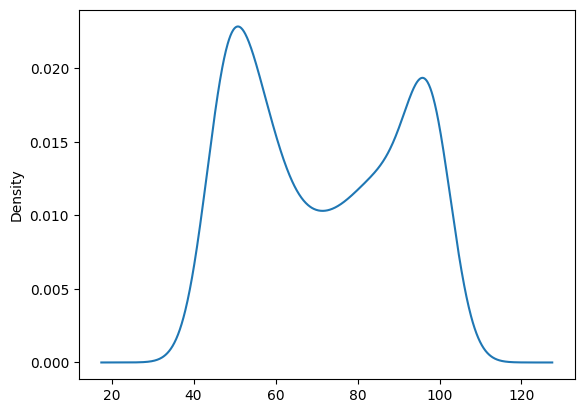

In [176]:
#idea of plot to visualize the distribution for only one feature

df['snoring_range'].plot(kind='kde')

<Axes: >

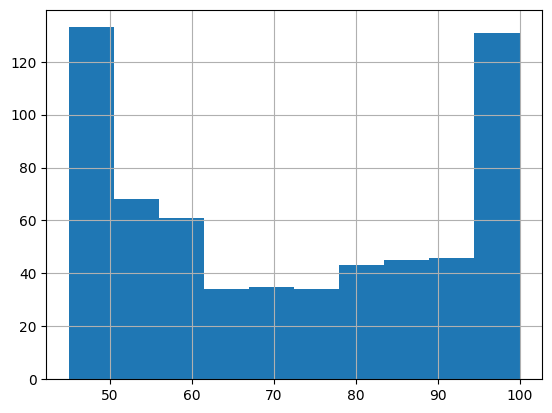

In [177]:
#idea of histogram to visualize the distribution for only one feature

df['snoring_range'].hist(bins=10) #argument bins to change the nb of bars

array([[<Axes: title={'center': 'snoring_range'}>,
        <Axes: title={'center': 'respiration_rate'}>,
        <Axes: title={'center': 'body_temperature'}>],
       [<Axes: title={'center': 'limb_movement_rate'}>,
        <Axes: title={'center': 'blood_oxygen_levels'}>,
        <Axes: title={'center': 'rapid_eye_movement'}>],
       [<Axes: title={'center': 'hour_of_sleep'}>,
        <Axes: title={'center': 'heart_rate'}>,
        <Axes: title={'center': 'stress_level'}>]], dtype=object)

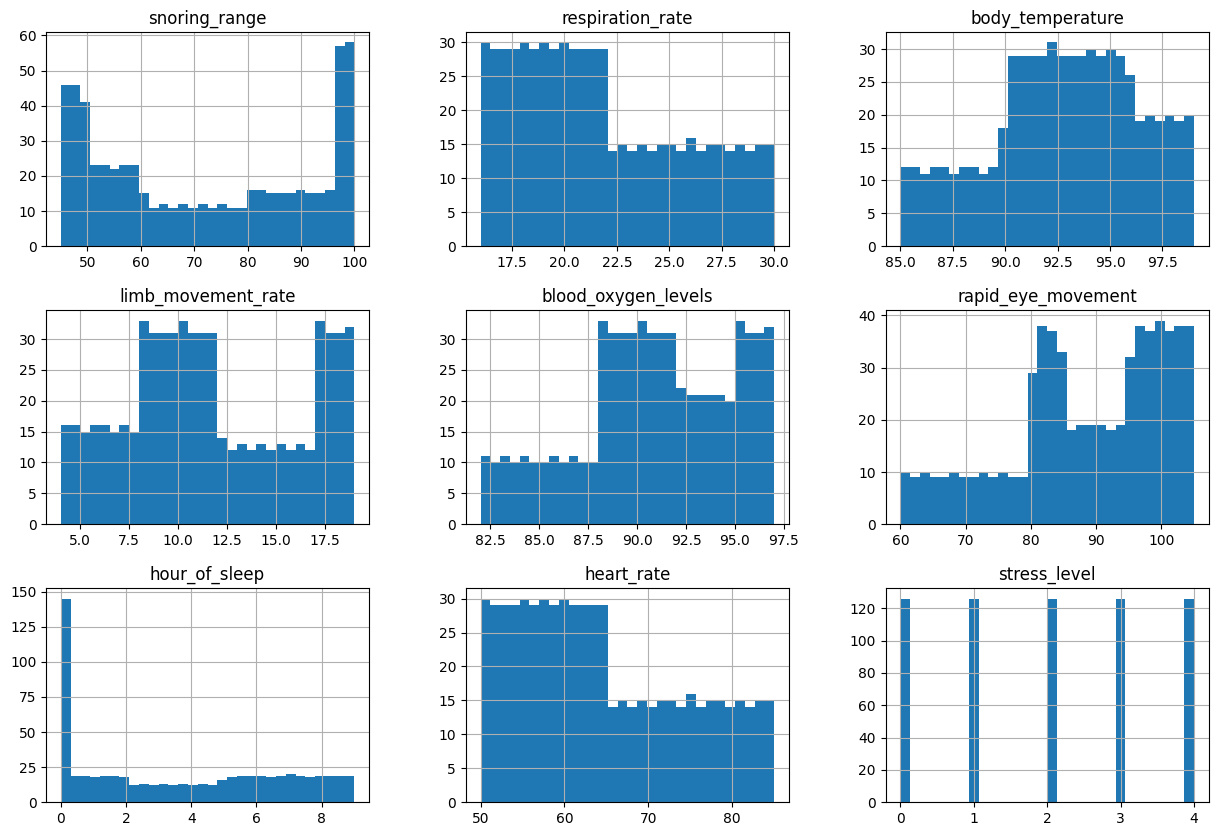

In [178]:
#idea of histograms to visualize the distribution of all features (and stress level) at once
#no absurd point found for any of the feature from the histograms
#idea in case of excessively high or low values: define a range and drop all rows outside of the range for each feature

df.hist(bins=30, figsize=(15, 10))

<Axes: >

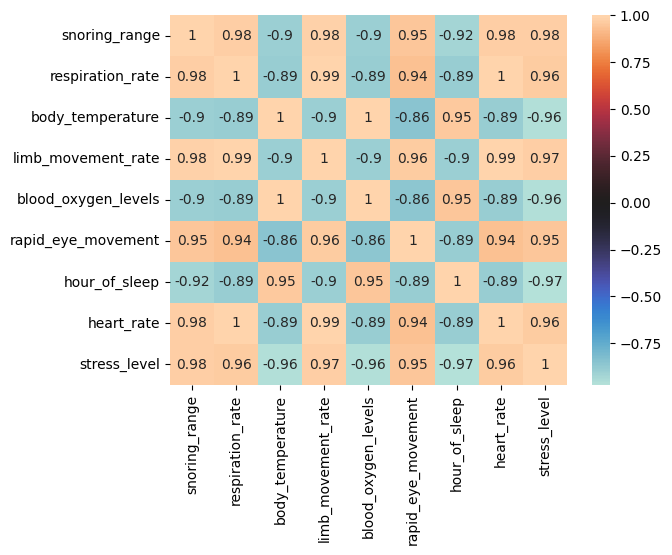

In [179]:
#df.corr() computes pairwise correlation of columns and returns a correlation matrix to identify any highly correlated features.

#A value of +1 is the result of a perfect positive relationship (both variables move in the same direction)
#A value of -1 represents a perfect negative relationship (as one variable increases, the other decreases; they are inversely related)
#A zero indicates no correlation.

#In our case, the respiration rate and the heart rate are redundant as they have a perfect correlation -> use only one of them to train the model
#In our case, the blood oxygen level and the body temperature are redundant as they have a perfect correlation -> use only one of them to train the model

sns.heatmap(df.corr(), annot=True, center=0) #argument annot for the annotations and center to have a darker color when you get close to no correlation

***DATA PREPROCESSING***

In [225]:
#SLITTING THE DATA
#2 features removed (see correlation matrix)
#test_size set for 80% training and 20% testing
#with train_test_split, the dataset is shuffled before the splitting
#random state=0 to always have the same training and testing values across several function calls

X = df[['snoring_range', 'respiration_rate','body_temperature','limb_movement_rate', 'rapid_eye_movement', 'hour_of_sleep']]
y = df[['stress_level']]
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#we could further separate the training set into training and validation to evaluate the model's learning

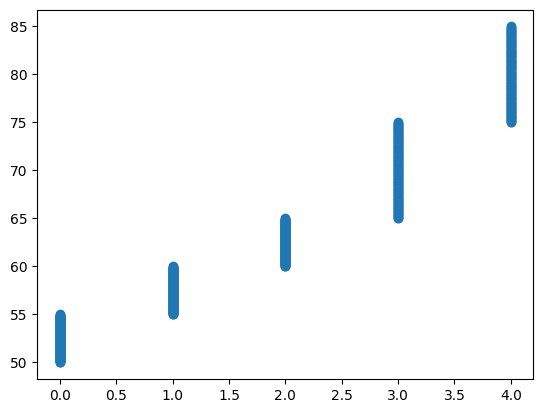

In [226]:
#plot to understand why the model has a great accuracy -> a few values overlap (for all features)

plt.scatter(df['stress_level'], df['heart_rate'])

In [239]:
#SCALLING
#Scale the features (but not stress_level!) to a similar range to avoid bias in distance calculations
#use of min-max scaling (strandard scaling to avoid as the distribution of the features is not normal)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train) #fit to the shape of X, then transform
X_test = scaler.transform(X_test)

import numpy as np
y_train = np.ravel(y_train)

***KNN MODEL TRAINING***

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


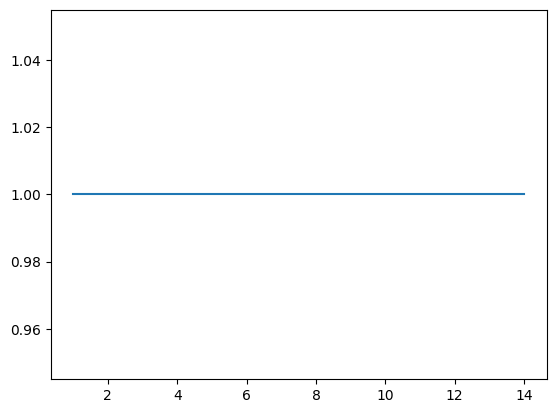

In [240]:
#Use scikit-learn's KNeighborsClassifier to train a KNN model
#No mistake done by the model (knn score = 1) for k from 1 to 10
#we could get a different score by having a smaller training set

from sklearn.neighbors import KNeighborsClassifier

knn_k = [i for i in range(1, 15)]
knn_scores = []
for i in knn_k: #try different values of k
  knn_i = KNeighborsClassifier(n_neighbors = i)
  knn_i.fit(X_train,y_train)
  score_i = knn_i.score(X_test,y_test)
  print(score_i)
  knn_scores.append(score_i)

plt.plot(knn_k, knn_scores)

In [241]:
knn = KNeighborsClassifier(n_neighbors = 4) #create an instance and choose 4 neighbors
knn.fit(X_train,y_train) #train
y_pred = knn.predict(X_test) #predict

In [242]:
#perfect result

from sklearn.metrics import classification_report, confusion_matrix
KNN_score = knn.score(X_test,y_test) #mean accuracy
print(KNN_score)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

1.0
[[28  0  0  0  0]
 [ 0 19  0  0  0]
 [ 0  0 22  0  0]
 [ 0  0  0 28  0]
 [ 0  0  0  0 29]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        22
           3       1.00      1.00      1.00        28
           4       1.00      1.00      1.00        29

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



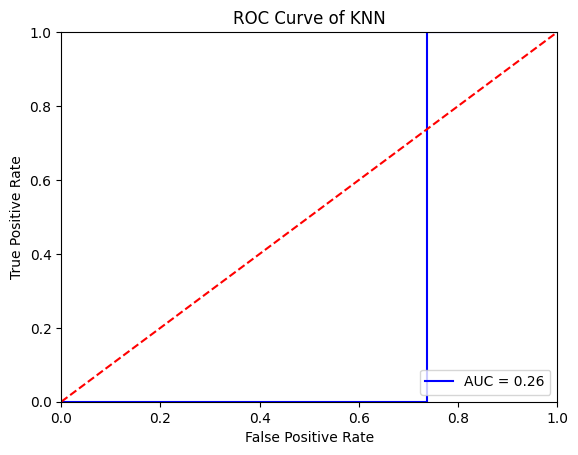

In [243]:
#usefull is stress_level was binary?

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
fpr, tpr, threshold =roc_curve(y_test,  y_pred, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of KNN')
plt.show()


***DECISION TREE MODEL TRAINING***

In [244]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier() #create an instance
dtc.fit(X_train,y_train) #train
y_pred = dtc.predict(X_test) #predict

In [245]:
dtc_score = dtc.score(X_test,y_test) #mean accuracy
print(dtc_score)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9920634920634921
[[28  0  0  0  0]
 [ 0 19  0  0  0]
 [ 0  1 21  0  0]
 [ 0  0  0 28  0]
 [ 0  0  0  0 29]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       0.95      1.00      0.97        19
           2       1.00      0.95      0.98        22
           3       1.00      1.00      1.00        28
           4       1.00      1.00      1.00        29

    accuracy                           0.99       126
   macro avg       0.99      0.99      0.99       126
weighted avg       0.99      0.99      0.99       126



[Text(0.5555555555555556, 0.875, 'snoring_range <= 0.274\ngini = 0.8\nsamples = 504\nvalue = [98, 107, 104, 98, 97]'),
 Text(0.3333333333333333, 0.625, 'limb_movement_rate <= 0.267\ngini = 0.499\nsamples = 205\nvalue = [98, 107, 0, 0, 0]'),
 Text(0.2222222222222222, 0.375, 'body_temperature <= 0.714\ngini = 0.02\nsamples = 99\nvalue = [98, 1, 0, 0, 0]'),
 Text(0.1111111111111111, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0, 0]'),
 Text(0.3333333333333333, 0.125, 'gini = 0.0\nsamples = 98\nvalue = [98, 0, 0, 0, 0]'),
 Text(0.4444444444444444, 0.375, 'gini = 0.0\nsamples = 106\nvalue = [0, 106, 0, 0, 0]'),
 Text(0.7777777777777778, 0.625, 'body_temperature <= 0.501\ngini = 0.666\nsamples = 299\nvalue = [0, 0, 104, 98, 97]'),
 Text(0.6666666666666666, 0.375, 'snoring_range <= 0.918\ngini = 0.5\nsamples = 195\nvalue = [0, 0, 0, 98, 97]'),
 Text(0.5555555555555556, 0.125, 'gini = 0.0\nsamples = 98\nvalue = [0, 0, 0, 98, 0]'),
 Text(0.7777777777777778, 0.125, 'gini = 0.0\nsamples = 

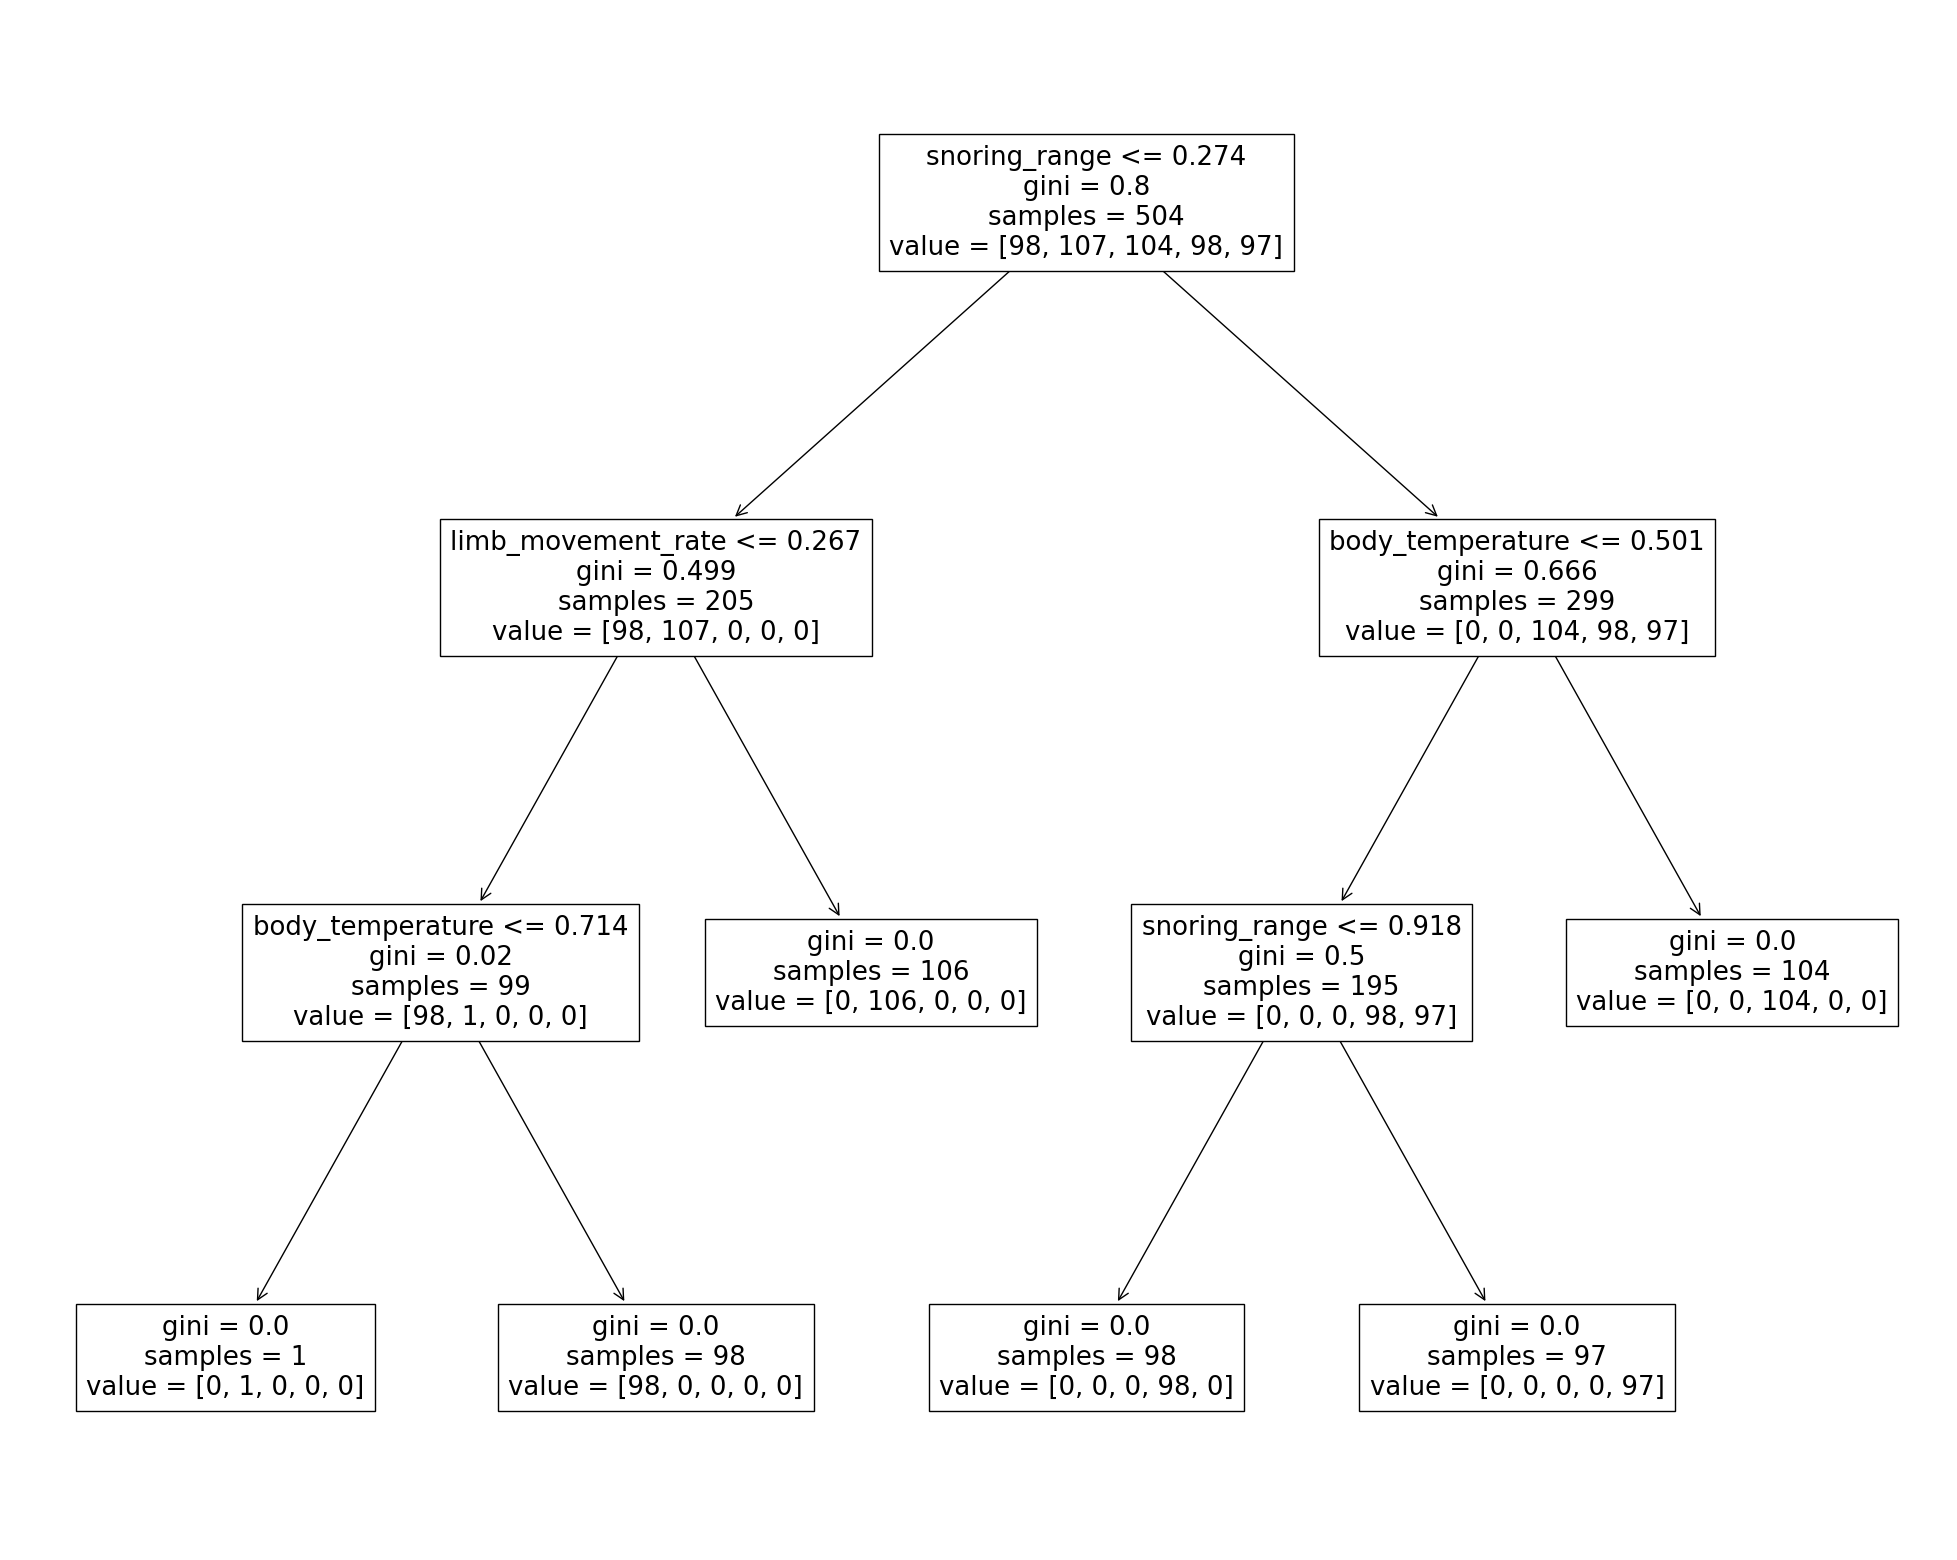

In [246]:
#visualize the tree

from sklearn import tree
fig = plt.figure(figsize=(25,20))
tree.plot_tree(dtc,
               feature_names=['snoring_range', 'respiration_rate','body_temperature','limb_movement_rate', 'rapid_eye_movement', 'hour_of_sleep'])

comparison: Excellent results obtained for both models. 1 mistake done by the decision tree model while no mistake was done by the KNN model for the chosen parameters (traing test size, features, etc.)